In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import datetime 

%matplotlib inline
data = pd.read_csv('Medical_No_Shows.csv',index_col=None, header=0,delim_whitespace=False,delimiter='\s+|\t+|,',engine='python',usecols=['PatientID','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','LocationID','MedicaidIND','Hypertension','Diabetes','Alcoholism','Disability','SMS_received','No_show'])
data.No_show = pd.Series(np.where(data.No_show.values == 'Yes', 0, 1), data.index)
data.Gender = pd.Series(np.where(data.Gender.values == 'M', 1, 0), data.index)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [30]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_show
0,#29872499824296,5642903,0,2016-04-29 18:38:08,2016-04-29,62,40,0,1,0,0,0,0,1
1,#558997776694438,5642503,1,2016-04-29 16:08:27,2016-04-29,56,40,0,0,0,0,0,0,1
2,#4262962299951,5642549,0,2016-04-29 16:19:04,2016-04-29,62,47,0,0,0,0,0,0,1
3,#867951213174,5642828,0,2016-04-29 17:29:31,2016-04-29,8,55,0,0,0,0,0,0,1
4,#8841186448183,5642494,0,2016-04-29 16:07:23,2016-04-29,56,40,0,1,1,0,0,0,1


In [52]:
temp = data.groupby('AppointmentDay').agg(['mean', 'count'])
temp[12:17]

AppointmentID          Gender              Age        \
                        mean count      mean count       mean count   
AppointmentDay                                                        
2016-05-16      5.663488e+06  4613  0.360936  4613  36.349881  4613   
2016-05-17      5.672092e+06  4372  0.332342  4372  36.938472  4372   
2016-05-18      5.674106e+06  4373  0.350332  4373  36.482049  4373   
2016-05-19      5.678219e+06  4270  0.357611  4270  36.985480  4270   
2016-05-20      5.681958e+06  3828  0.354754  3828  36.535789  3828   

               LocationID       MedicaidIND        ...   Diabetes        \
                     mean count        mean count  ...       mean count   
AppointmentDay                                     ...                    
2016-05-16      41.783221  4613    0.099935  4613  ...   0.067852  4613   
2016-05-17      42.870997  4372    0.091720  4372  ...   0.066560  4372   
2016-05-18      42.664990  4373    0.097645  4373  ...   0.072490  4373   
2016-05-19      41.861827  4270    0.089227  4270  ...   0.063700  4270   
2016-05-20      42.438088  3828    0.096134  3828  ...   0.073929  3828   

               Alcoholism       Disability       SMS_received         No_show  \
                     mean count       mean count         mean count      mean   
AppointmentDay                                                                  
2016-05-16       0.033601  4613   0.018209  4613          0.0  4613  0.772599   
2016-05-17       0.025846  4372   0.023559  4372          0.0  4372  0.786139   
2016-05-18       0.028127  4373   0.018523  4373          0.0  4373  0.796478   
2016-05-19       0.028337  4270   0.027869  4270          0.0  4270  0.791101   
2016-05-20       0.034744  3828   0.024556  3828          0.0  3828  0.765152   

                      
               count  
AppointmentDay        
2016-05-16      4613  
2016-05-17      4372  
2016-05-18      4373  
2016-05-19      4270  
2016-05-20      3828  

[5 rows x 22 columns]

In [87]:
temp[19:24]

AppointmentID          Gender              Age        \
                        mean count      mean count       mean count   
AppointmentDay                                                        
2016-05-30      5.699345e+06  4514  0.352681  4514  37.119849  4514   
2016-05-31      5.707500e+06  4279  0.346109  4279  37.810937  4279   
2016-06-01      5.719967e+06  4464  0.349238  4464  38.109991  4464   
2016-06-02      5.726281e+06  4310  0.362877  4310  38.201160  4310   
2016-06-03      5.727837e+06  4090  0.349633  4090  38.477995  4090   

               LocationID       MedicaidIND        ...   Diabetes        \
                     mean count        mean count  ...       mean count   
AppointmentDay                                     ...                    
2016-05-30      42.188303  4514    0.106779  4514  ...   0.069783  4514   
2016-05-31      42.777518  4279    0.101426  4279  ...   0.070110  4279   
2016-06-01      42.345430  4464    0.096998  4464  ...   0.073925  4464   
2016-06-02      43.225754  4310    0.092343  4310  ...   0.074478  4310   
2016-06-03      41.930807  4090    0.098533  4090  ...   0.083863  4090   

               Alcoholism       Disability       SMS_received         No_show  \
                     mean count       mean count         mean count      mean   
AppointmentDay                                                                  
2016-05-30       0.029021  4514   0.018387  4514     0.535224  4514  0.803279   
2016-05-31       0.030615  4279   0.020799  4279     0.513905  4279  0.820753   
2016-06-01       0.030242  4464   0.021281  4464     0.382841  4464  0.818100   
2016-06-02       0.034571  4310   0.022738  4310     0.389095  4310  0.813921   
2016-06-03       0.033985  4090   0.022983  4090     0.384108  4090  0.803178   

                      
               count  
AppointmentDay        
2016-05-30      4514  
2016-05-31      4279  
2016-06-01      4464  
2016-06-02      4310  
2016-06-03      4090  

[5 rows x 22 columns]

Text(0.5, 17.200000000000003, 'Day')

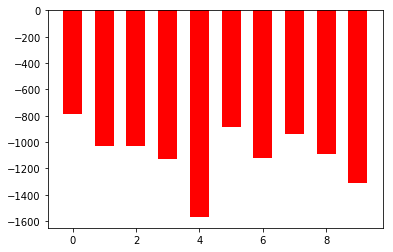

In [113]:
temp['No_show']['count']
x_val = temp['No_show']['count'].index
y_val = temp['No_show']['count'].values
ax = plt.subplot(111)
#ax.bar(x_val[12:17]+x_val[19:24], y_val[12:17]+y_val[19:24], width=0.5)
y_selected = list(y_val[12:17])+list(y_val[19:24])
y_substract = [x - 5400 for x in y_selected]
x_selected = range(0,10)
ax.bar(x_selected, y_substract, width=0.6, color='r')
ax_1.set_ylabel('Number of patients show up \n more/less than the clinic could serve')
ax_1.set_xlabel('Day')

In [122]:
Prob = [0.772599, 0.786139, 0.796478, 0.791101, 0.765152, 0.803279,0.820753, 0.818100, 0.813921, 0.803178]
y_clas = [x/y for x, y in zip(y_selected, Prob)]

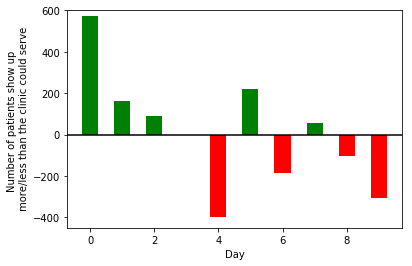

In [125]:
ax_1 = plt.subplot(111)
y_substract = [x - 5400 for x in y_clas]
y_color = []
tot = 0
for item in y_substract:
    tot += item
    if(item < 0):
        y_color.append('r')
    else:
        y_color.append('g')
ax_1.set_ylim([-450, 600])
ax_1.bar(x_selected, y_substract, width=0.5, color=y_color)
ax_1.set_ylabel('Number of patients show up \n more/less than the clinic could serve')
ax_1.set_xlabel('Day')
ax_1.axhline(0, color="black")